In [3]:
from pm4py.objects.log.importer.xes import importer as xes_import_factory


In [12]:
under_60 = xes_import_factory.apply('../Event Logs/under_60.xes/under_60.xes')
over_60 = xes_import_factory.apply('../Event Logs/over_60.xes/over_60.xes')


In [13]:
len(under_60)

223

In [14]:
len(over_60)

827

In [43]:
import pandas as pd
import numpy as np

In [89]:
pd.DataFrame(over_60[0])

,Abnormal Anion Gap,Abnormal Bicarbonate,Abnormal Chloride,Abnormal Creatinine,Abnormal Glucose,Abnormal Hematocrit,Abnormal Hemoglobin,Abnormal INR(PT),Abnormal MCH,Abnormal MCHC,...,concept:name,department,discharge_location,ethnicity,insurance,lifecycle:transition,marital_status,stay_id,time:timestamp,transfer_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Emergency Department,Emergency Department,NaN,WHITE,Medicare,start,MARRIED,NaN,2116-01-03 13:32:00+01:00,31433513
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Emergency Department,Emergency Department,NaN,WHITE,Medicare,complete,MARRIED,NaN,2116-01-03 16:00:00+01:00,31433513
2,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,Cardiac ICU,Cardiac ICU,NaN,NaN,NaN,start,NaN,36107959.0,2116-01-03 16:00:00+01:00,36107959
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,Cardiac ICU,Cardiac ICU,NaN,NaN,NaN,complete,NaN,36107959.0,2116-01-06 18:44:57+01:00,36107959
4,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,...,Post-ICU Cardiology,Post-ICU Cardiology,NaN,NaN,NaN,start,NaN,NaN,2116-01-06 18:44:57+01:00,38390977
5,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,...,Post-ICU Cardiology,Post-ICU Cardiology,NaN,NaN,NaN,complete,NaN,NaN,2116-01-07 16:33:01+01:00,38390977
6,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,...,Discharged,Discharged,HOME HEALTH CARE,NaN,NaN,start,NaN,NaN,2116-01-07 16:33:01+01:00,36403367
7,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,...,Discharged,Discharged,HOME HEALTH CARE,NaN,NaN,complete,NaN,NaN,2116-01-07 16:33:02+01:00,36403367


In [88]:
pd.DataFrame(over_60[0]).columns

Index(['Abnormal Anion Gap', 'Abnormal Bicarbonate', 'Abnormal Chloride',
       'Abnormal Creatinine', 'Abnormal Glucose', 'Abnormal Hematocrit',
       'Abnormal Hemoglobin', 'Abnormal INR(PT)', 'Abnormal MCH',
       'Abnormal MCHC', 'Abnormal MCV', 'Abnormal Magnesium', 'Abnormal PT',
       'Abnormal PTT', 'Abnormal Phosphate', 'Abnormal Platelet Count',
       'Abnormal Potassium', 'Abnormal RDW', 'Abnormal Red Blood Cells',
       'Abnormal Sodium', 'Abnormal Urea Nitrogen',
       'Abnormal White Blood Cells', 'Anion Gap', 'Bicarbonate', 'Chloride',
       'Creatinine', 'DBP', 'GCS - Eye Opening', 'GCS - Motor Response',
       'GCS - Verbal Response', 'Glucose', 'Heart Rate', 'Hematocrit',
       'Hemoglobin', 'INR(PT)', 'MCH', 'MCHC', 'MCV', 'Magnesium',
       'O2 saturation', 'PT', 'PTT', 'Phosphate', 'Platelet Count',
       'Potassium', 'RDW', 'Red Blood Cells', 'Respiratory Rate', 'SBP',
       'Sodium', 'Temperature F', 'Urea Nitrogen', 'White Blood Cells',
       'admi

In [70]:
import scipy.stats

In [81]:
def mean_values(log, value):
    mean_pHs = []
    for trace in log:
        sum = 0
        count = 0
        for event in trace:
            if value in event:
                sum += event[value]
                count += 1
        if sum > 0:
            mean_pHs.append(sum / count)
    return mean_pHs

In [105]:
o6 = mean_values(over_60, "pH")
u6 = mean_values(under_60, "pH")

In [106]:
scipy.stats.kruskal(o6, u6)

KruskalResult(statistic=13.933932542711123, pvalue=0.000189349180788164)

In [90]:
o6 = mean_values(over_60, "Phosphate")
u6 = mean_values(under_60, "Phosphate")

In [91]:
scipy.stats.kruskal(o6, u6)

KruskalResult(statistic=13.821578403544079, pvalue=0.00020101430695451398)

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

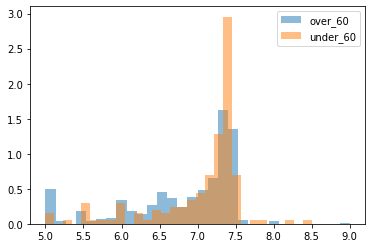

In [141]:
plt.hist(o6, label='over_60', bins=30, density=True, stacked=True, alpha=.5)
plt.hist(u6, label='under_60', bins=30, density=True, stacked=True, alpha=.5)
plt.legend()

In [ ]:
plt.boxplot([o6, u6])

In [155]:
def compare_value(value):
    o6 = mean_values(over_60, value)
    u6 = mean_values(under_60, value)
    
    kruskal = scipy.stats.kruskal(o6, u6)
    print(kruskal)
    
    plt.hist(o6, label='over_60', bins=30, density=True, stacked=True, alpha=.5)
    plt.hist(u6, label='under_60', bins=30, density=True, stacked=True, alpha=.5)
    plt.legend()
    plt.show()
    
    plt.boxplot([o6, u6])
    plt.show()

KruskalResult(statistic=13.933932542711123, pvalue=0.000189349180788164)


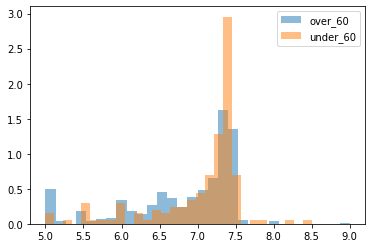

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


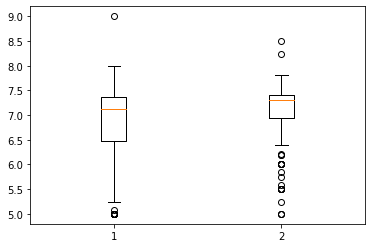

In [156]:
compare_value("pH")

Abnormal Anion Gap
KruskalResult(statistic=6.146035775499058, pvalue=0.013170700182922343)


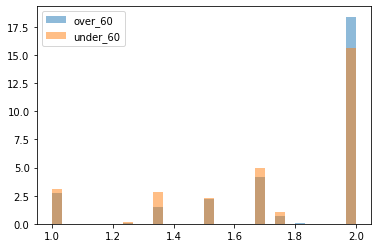

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


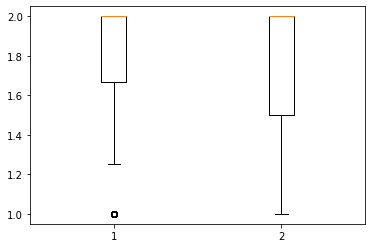

---
Abnormal Bicarbonate
KruskalResult(statistic=0.2167240861645257, pvalue=0.6415474175195766)


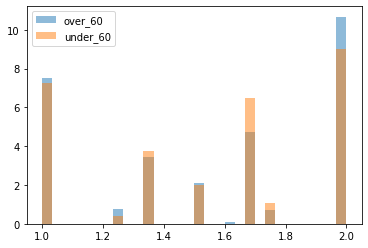

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


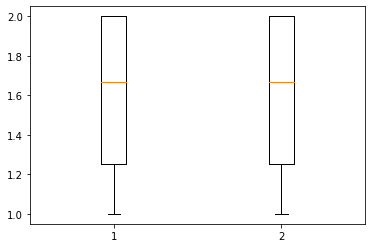

---
Abnormal Chloride
KruskalResult(statistic=6.9939840027389035, pvalue=0.008178411632197836)


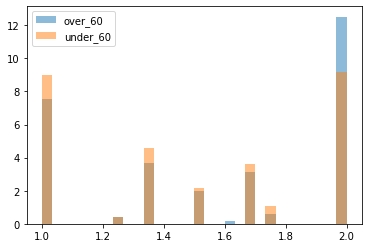

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


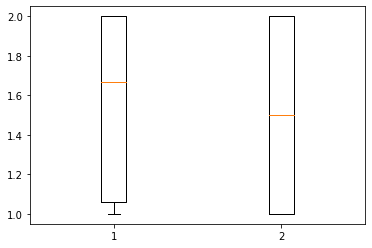

---
Abnormal Creatinine
KruskalResult(statistic=4.139019325694864, pvalue=0.04190543982031831)


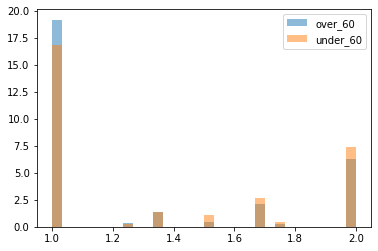

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


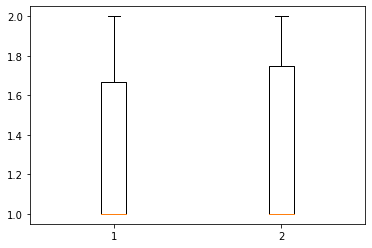

---
Abnormal Glucose
KruskalResult(statistic=0.03366875807421014, pvalue=0.8544131839284015)


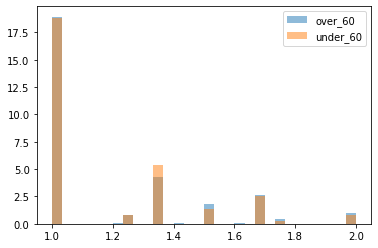

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


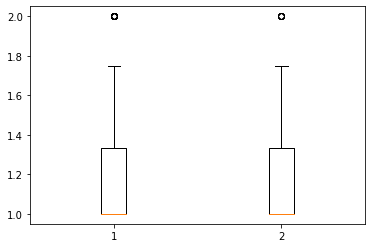

---
Abnormal Hematocrit
KruskalResult(statistic=0.4476097677016306, pvalue=0.5034722285240107)


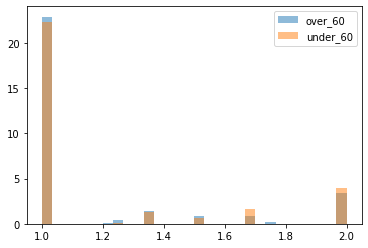

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


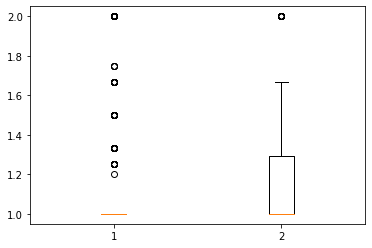

---
Abnormal Hemoglobin
KruskalResult(statistic=0.030156837358596606, pvalue=0.8621348435625148)


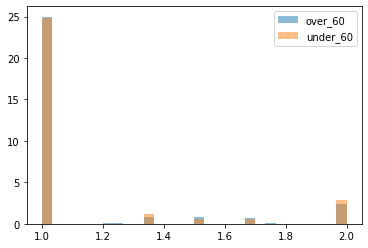

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


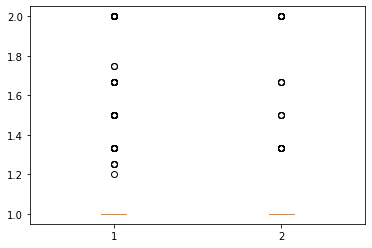

---
Abnormal INR(PT)
KruskalResult(statistic=9.76600856401283, pvalue=0.0017776796840132966)


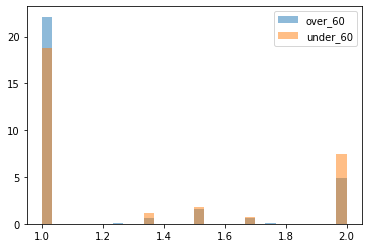

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


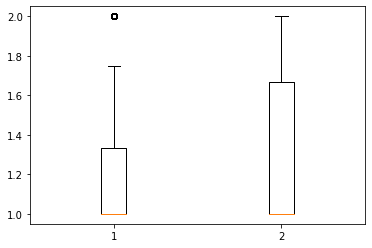

---
Abnormal MCH
KruskalResult(statistic=1.237157458926547, pvalue=0.26601958487730243)


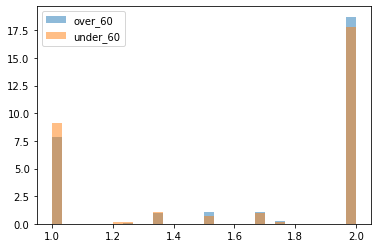

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


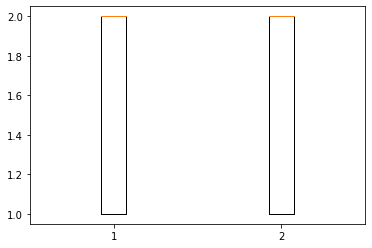

---
Abnormal MCHC
KruskalResult(statistic=1.8959471527173557, pvalue=0.16853266399310676)


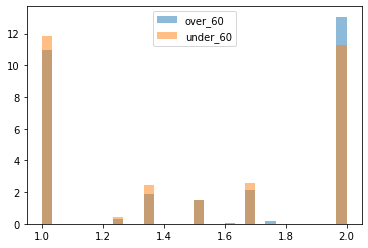

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


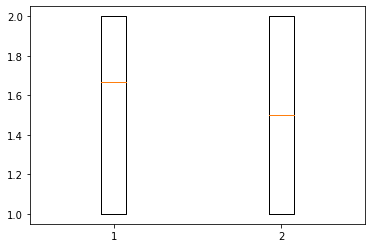

---
Abnormal MCV
KruskalResult(statistic=0.7091690126183327, pvalue=0.39971981765535547)


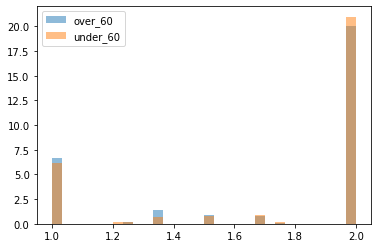

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


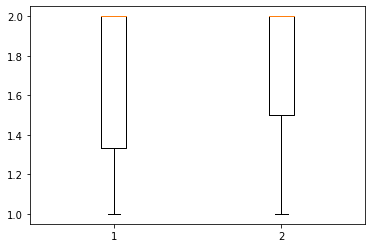

---
Abnormal Magnesium
KruskalResult(statistic=0.5236895726709826, pvalue=0.46927204479854345)


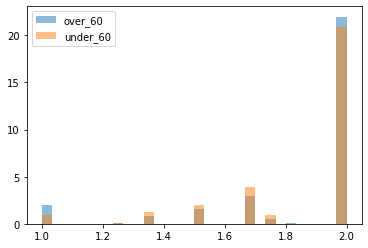

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


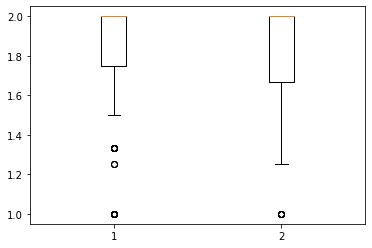

---
Abnormal PT
KruskalResult(statistic=9.117692501179057, pvalue=0.002531490787248327)


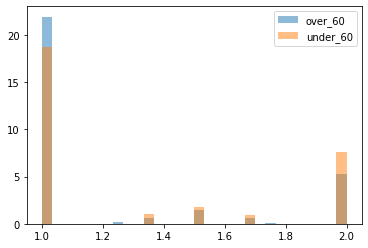

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


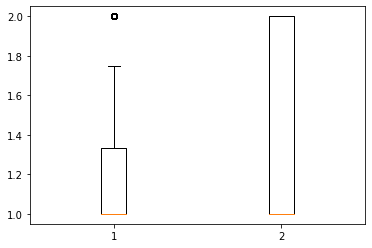

---
Abnormal PTT
KruskalResult(statistic=10.481029200271912, pvalue=0.0012060655096165056)


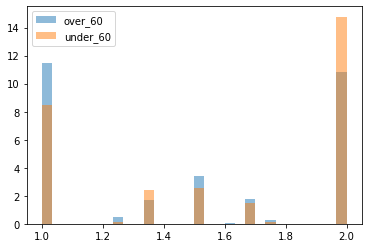

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


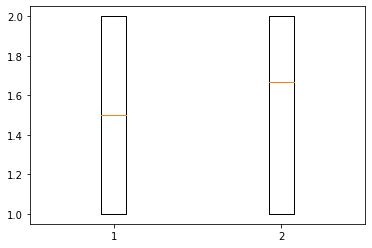

---
Abnormal Phosphate
KruskalResult(statistic=5.5034235112080125, pvalue=0.018979281507929286)


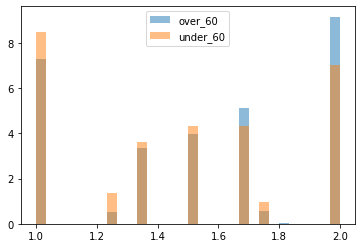

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


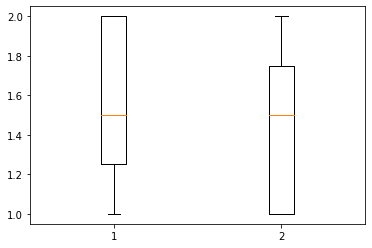

---
Abnormal Platelet Count
KruskalResult(statistic=0.4842770174140561, pvalue=0.4864913639858751)


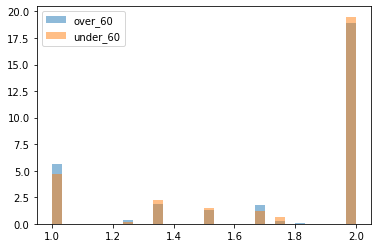

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


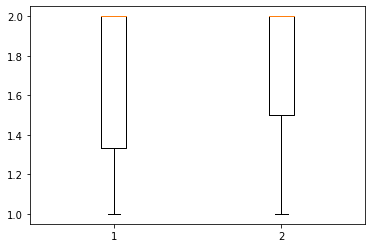

---
Abnormal Potassium
KruskalResult(statistic=1.7973500512118434, pvalue=0.18003319119567962)


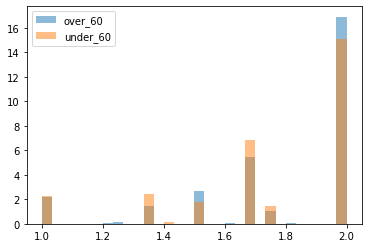

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


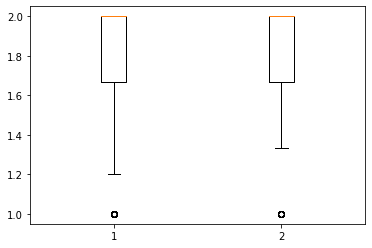

---
Abnormal RDW
KruskalResult(statistic=0.6057010116908168, pvalue=0.4364110620276256)


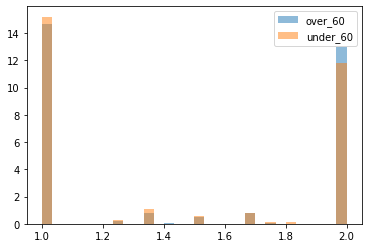

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


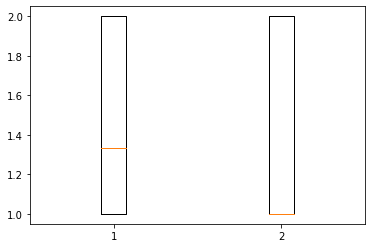

---
Abnormal Red Blood Cells
KruskalResult(statistic=15.461283979507114, pvalue=8.421265413612778e-05)


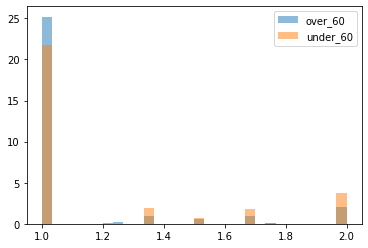

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


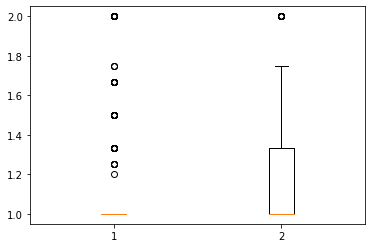

---
Abnormal Sodium
KruskalResult(statistic=0.005563029857016934, pvalue=0.9405443350404384)


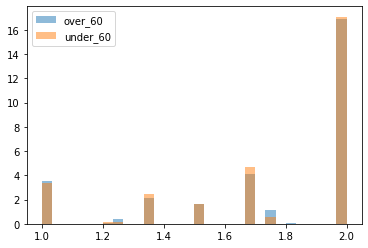

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


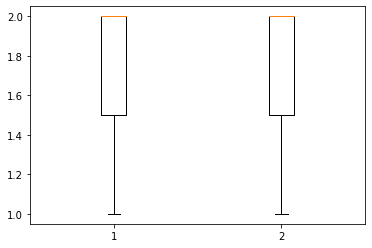

---
Abnormal Urea Nitrogen
KruskalResult(statistic=12.739098459751753, pvalue=0.00035809026162949463)


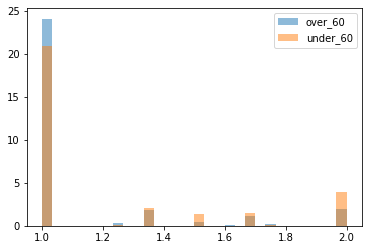

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


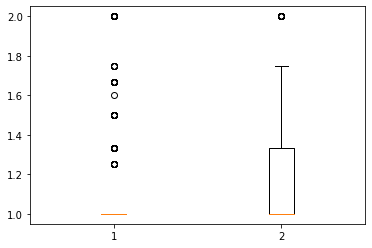

---
Abnormal White Blood Cells
KruskalResult(statistic=0.13266345703269938, pvalue=0.7156863033315165)


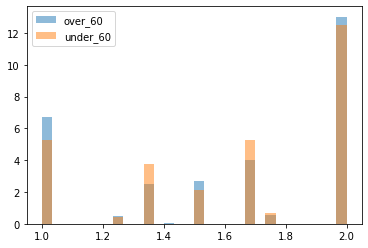

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


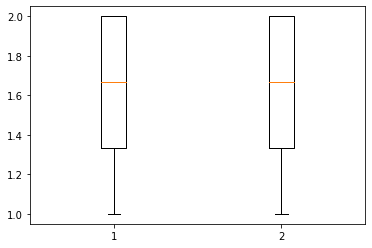

---
Anion Gap
KruskalResult(statistic=1.364981110413497, pvalue=0.24267607363548552)


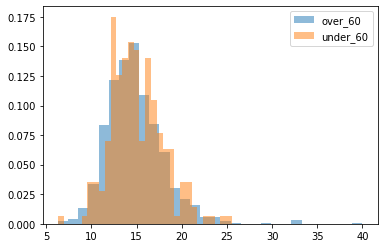

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


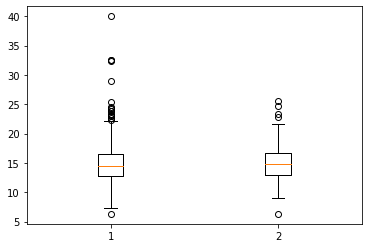

---
Bicarbonate
KruskalResult(statistic=0.1979474807170596, pvalue=0.656382706213953)


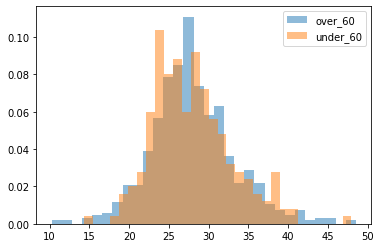

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


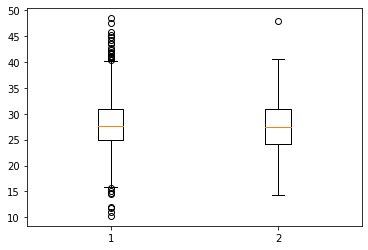

---
Chloride
KruskalResult(statistic=22.146173981647582, pvalue=2.526589980880588e-06)


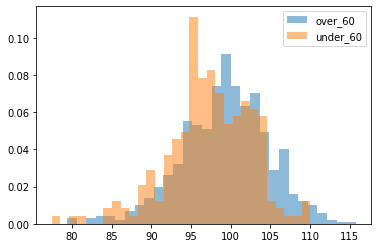

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


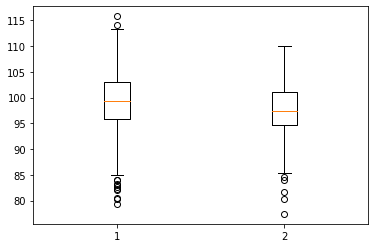

---
Creatinine
KruskalResult(statistic=0.26365729108063557, pvalue=0.6076186069396552)


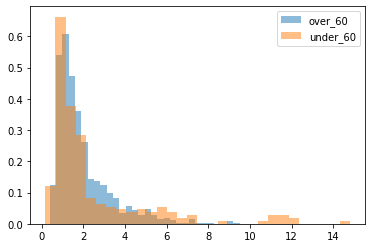

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


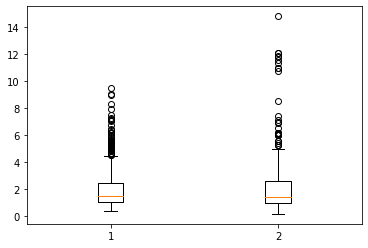

---
DBP
KruskalResult(statistic=113.21542588906043, pvalue=1.9355978183501104e-26)


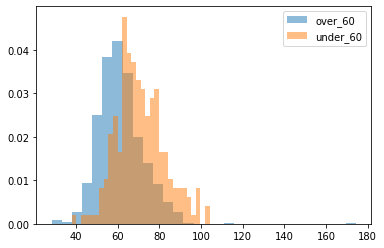

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


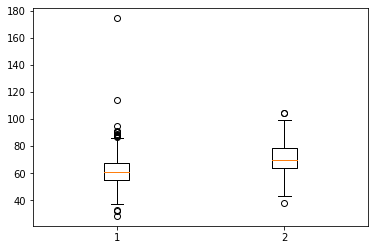

---
GCS - Eye Opening
KruskalResult(statistic=5.323052210654213, pvalue=0.021045117764092857)


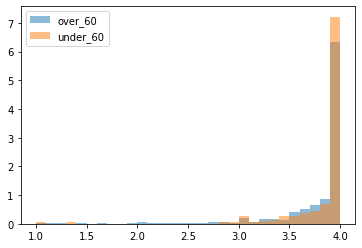

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


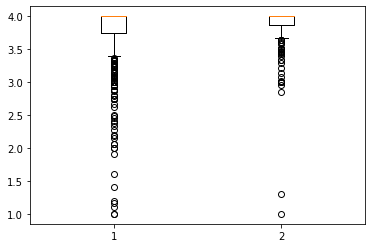

---
GCS - Motor Response
KruskalResult(statistic=7.223161545533706, pvalue=0.007196884110891352)


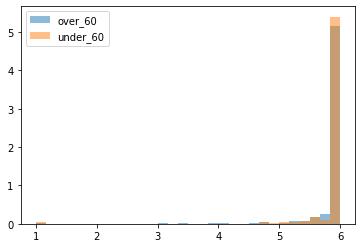

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


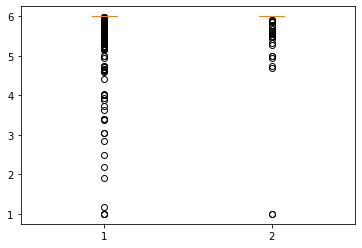

---
GCS - Verbal Response
KruskalResult(statistic=20.079826198235644, pvalue=7.4276042088667034e-06)


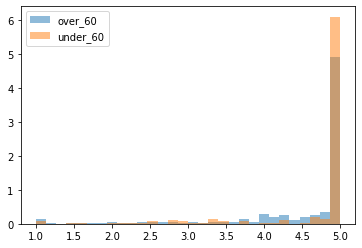

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


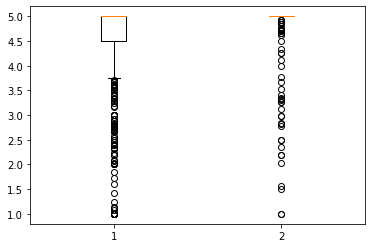

---
Glucose
KruskalResult(statistic=0.13868807634547156, pvalue=0.7095887407691575)


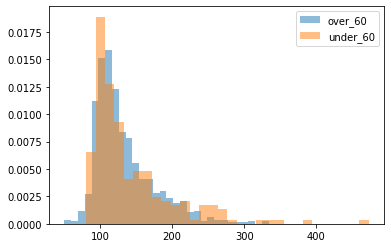

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


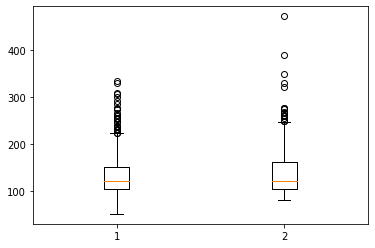

---
Heart Rate
KruskalResult(statistic=11.645708729715846, pvalue=0.0006435081192775741)


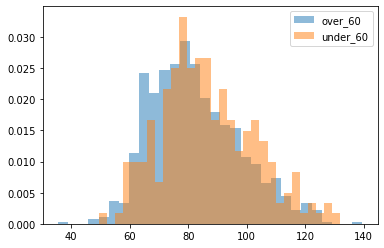

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


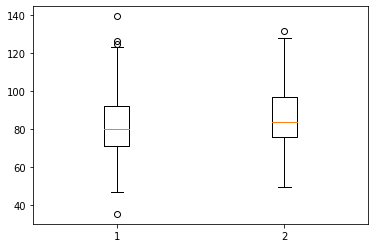

---
Hematocrit
KruskalResult(statistic=6.3969411244789605, pvalue=0.011431716318817623)


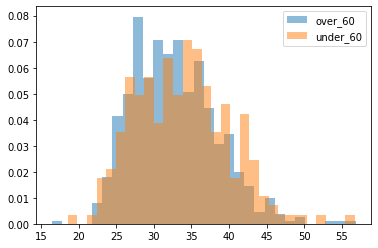

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


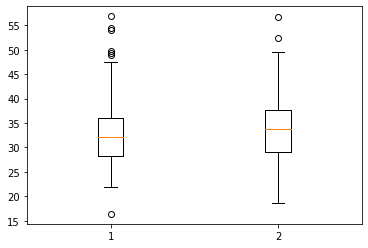

---
Hemoglobin
KruskalResult(statistic=3.8086253097494667, pvalue=0.05098928261937146)


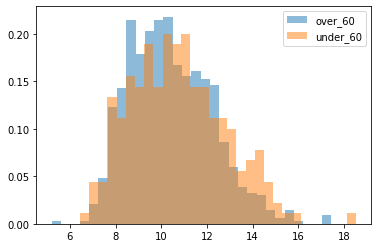

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


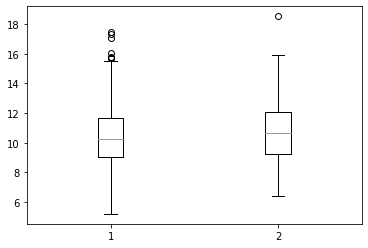

---
INR(PT)
KruskalResult(statistic=15.797046215306324, pvalue=7.051250379485443e-05)


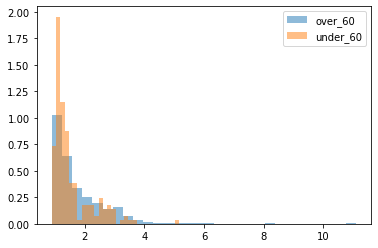

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


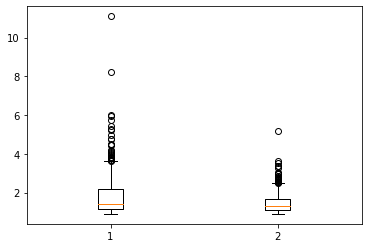

---
MCH
KruskalResult(statistic=19.777508453143483, pvalue=8.700044587172638e-06)


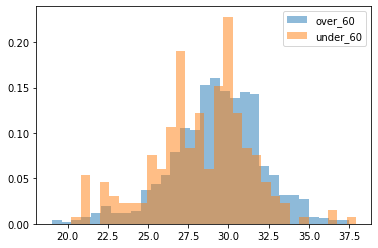

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


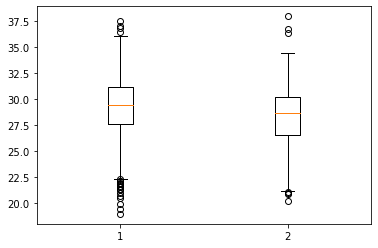

---
MCHC
KruskalResult(statistic=0.5357715210905922, pvalue=0.4641904477785568)


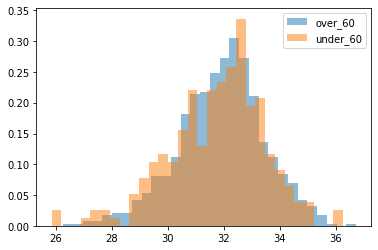

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


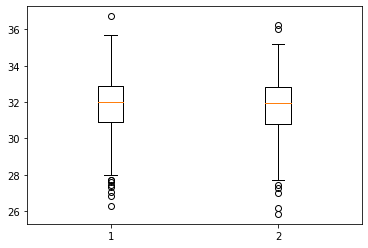

---
MCV
KruskalResult(statistic=25.436005345530674, pvalue=4.573029538152569e-07)


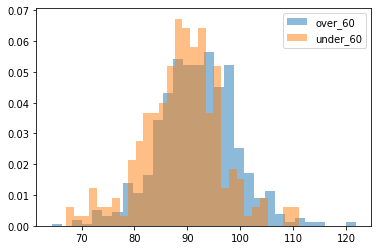

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


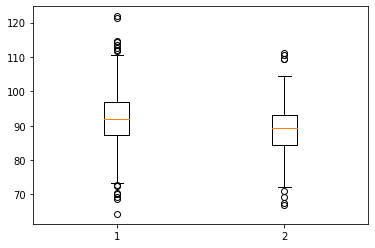

---
Magnesium
KruskalResult(statistic=8.941265380922754, pvalue=0.0027879951755736183)


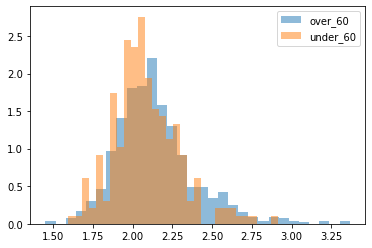

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


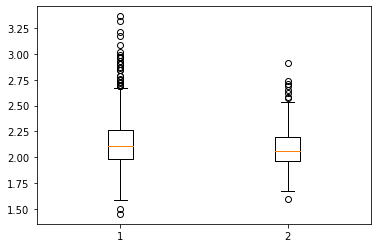

---
O2 saturation
KruskalResult(statistic=2.4804604724633723, pvalue=0.11526850135887266)


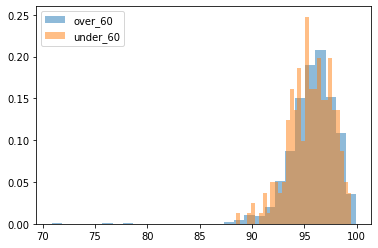

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


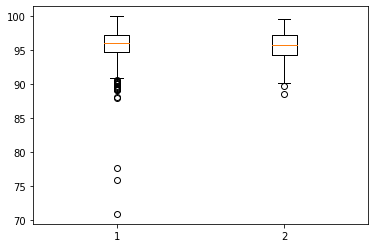

---
PT
KruskalResult(statistic=18.367452226178248, pvalue=1.821429060558412e-05)


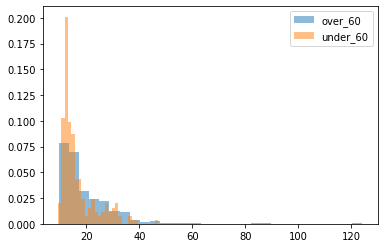

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


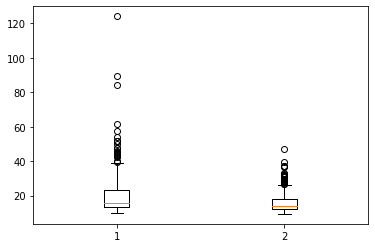

---
PTT
KruskalResult(statistic=5.347910577804097, pvalue=0.02074711867735745)


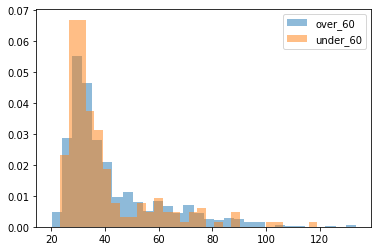

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


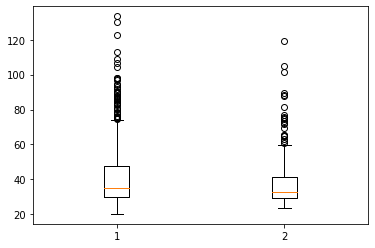

---
Phosphate
KruskalResult(statistic=13.821578403544079, pvalue=0.00020101430695451398)


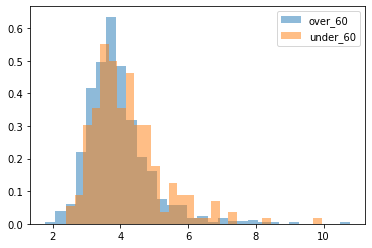

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


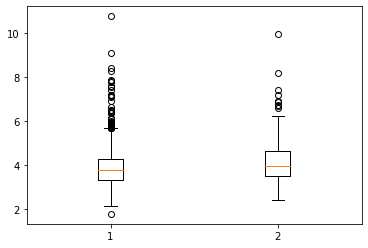

---
Platelet Count
KruskalResult(statistic=5.260348318427258, pvalue=0.021816652084697522)


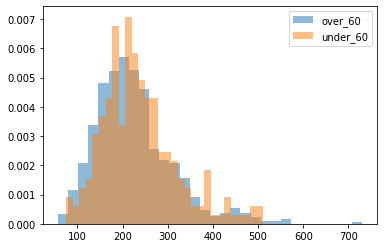

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


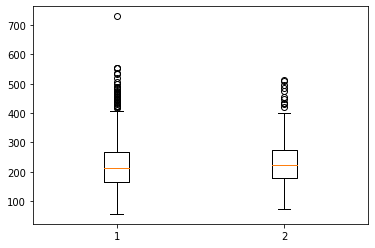

---
Potassium
KruskalResult(statistic=1.823060249091001, pvalue=0.17694943833690613)


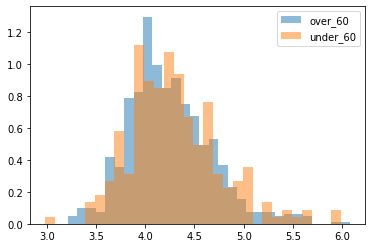

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


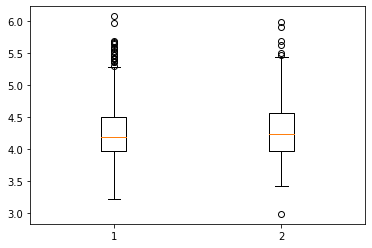

---
RDW
KruskalResult(statistic=0.556522110497472, pvalue=0.45566494103584987)


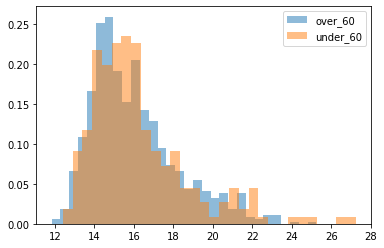

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


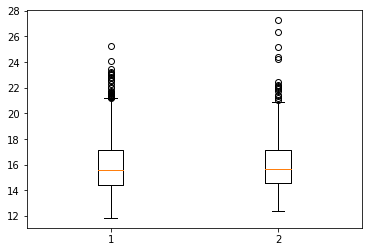

---
Red Blood Cells
KruskalResult(statistic=20.300495454664684, pvalue=6.618344352200123e-06)


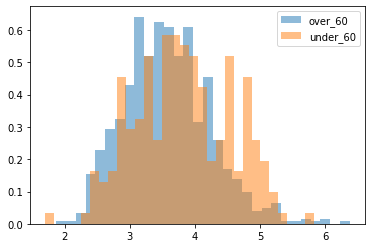

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


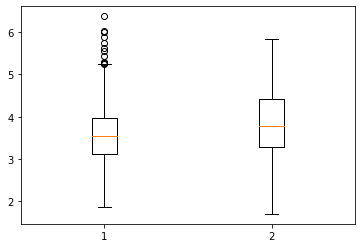

---
Respiratory Rate
KruskalResult(statistic=12.70822548516354, pvalue=0.00036405071723132635)


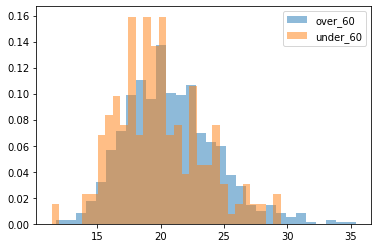

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


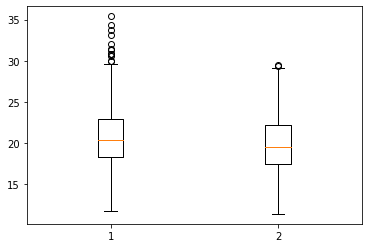

---
SBP
KruskalResult(statistic=15.217390240429449, pvalue=9.581698937888074e-05)


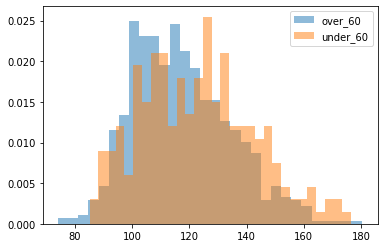

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


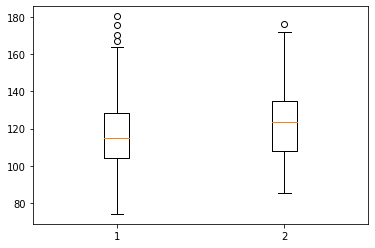

---
Sodium
KruskalResult(statistic=23.45902549322032, pvalue=1.2760267626554468e-06)


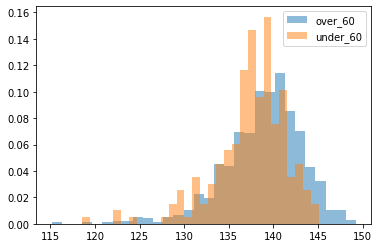

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


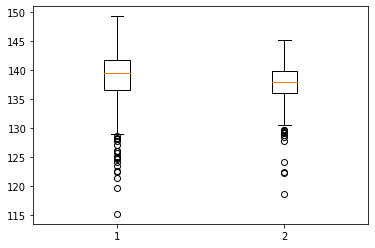

---
Temperature F
KruskalResult(statistic=50.548582367244045, pvalue=1.1625113103044017e-12)


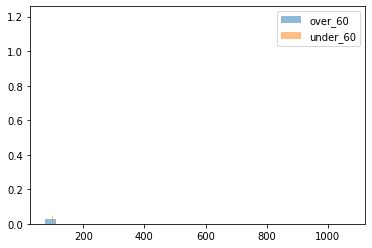

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


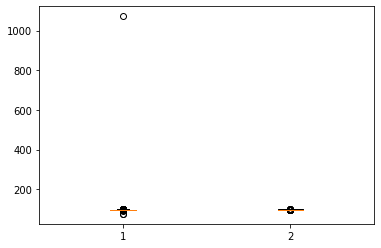

---
Urea Nitrogen
KruskalResult(statistic=16.198552435311665, pvalue=5.703768468391305e-05)


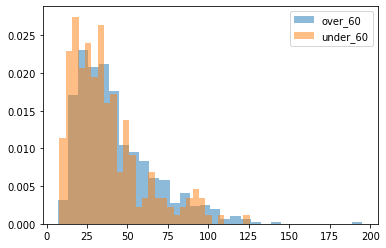

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


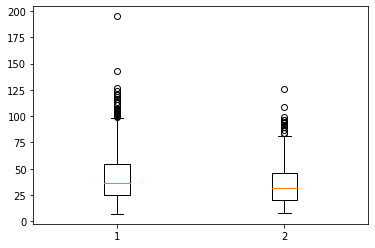

---
White Blood Cells
KruskalResult(statistic=8.414514926433545, pvalue=0.0037223709686216577)


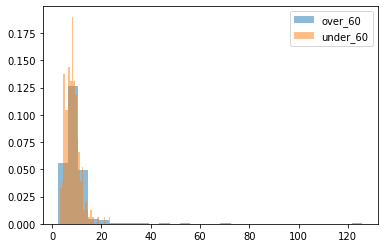

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


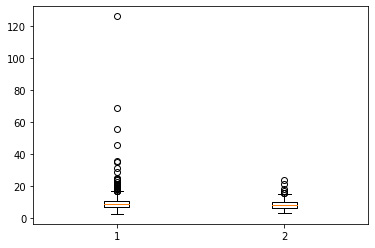

---
admission_location


TypeError: unsupported operand type(s) for +=: 'int' and 'str'

In [157]:
for value in pd.DataFrame(over_60[0]).columns:
    
    print(f"{value}")
    
    compare_value(value)
    
    print("---")